In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
 'OD280/OD315 of diluted wines', 'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
# This is the true test set. The split inside the sequential backward selection is for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [3]:
feature_labels = df_wine.columns[1:]

# Random Forests can rank the importance of each feature by computing the impurity
# The average impurity decrease along all trees in the forest is a measure of this
# It is useful since it works even if # features >> # data points and works for non-linear stuff
# However, it can be biased (especially with the Gini criterion) since it favors features that have many splitting points
# Even if they lack predictivity
rf = RandomForestClassifier(n_estimators=500, random_state=42).fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feature_labels[indices[f]], importances[indices[f]]))

 1) Color intensity                0.162303
 2) Alcohol                        0.151270
 3) Flavanoids                     0.147553
 4) Proline                        0.143969
 5) Hue                            0.097441
 6) OD280/OD315 of diluted wines   0.094434
 7) Total phenols                  0.057177
 8) Magnesium                      0.033139
 9) Malic acid                     0.032247
10) Alcalinity of ash              0.027883
11) Proanthocyanins                0.025907
12) Nonflavanoid phenols           0.013891
13) Ash                            0.012786


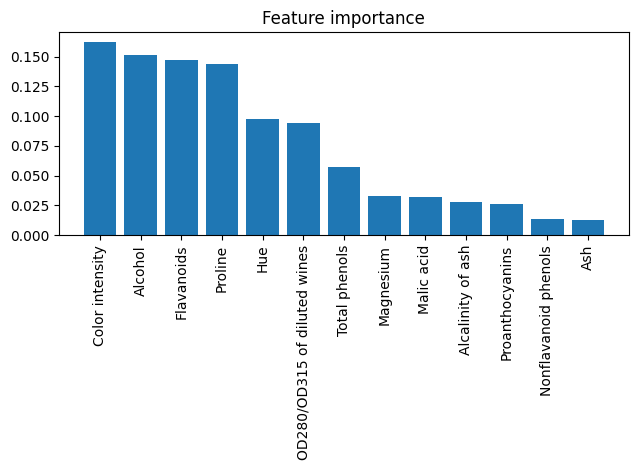

In [4]:
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

If 2 or more features are highly correlated, one feature might be ranked very highly while the information on the other feature might not be fully captured. If we are interested in sheer predictivity, this is not a huge problem, but this does impact interpretability - what features do customers look for, for example.

In [5]:
# There is a way to use the Random Forest to select out the features automatically
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf, threshold=0.1, prefit=True)

X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold', 'criterion:', X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feature_labels[indices[f]], importances[indices[f]]))

Number of features that meet this threshold criterion: 4
 1) Color intensity                0.162303
 2) Alcohol                        0.151270
 3) Flavanoids                     0.147553
 4) Proline                        0.143969
